## Data Cleaning and Data Wrangling

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [64]:
file = pd.read_csv('Ten+Questions+-+Test+Data_November+14,+2019_23.04.csv')
file = file[file.columns[:-2]]
file = file.drop([0, 1]).reset_index().drop('index', axis=1)

df = pd.DataFrame()
# Q45 - Please rate how troubled you feel about your stressful situation. Scale 0 (not troubled)-10 (very troubled)
file['Q45'] = file['Q45'].replace('', np.nan)
# Q46 - Please re-rate how troubled you feel about your stressful situation. Scale 0 (not troubled)-10 (very troubled)
file['Q46'] = file['Q46'].replace('', np.nan)

df["prestress"] = file["Q45"].fillna(file["Q31"])
df["poststress"] = file["Q46"].fillna(file["Q32"])

# Q109 - How old are you? Values allowed 18 to 100
df["age"] = file['Q109']
# Q110 - How would you describe your gender identity? 1-Male, 2-Female, 4-Other
df["gender"] = file['Q110']
# Q107 - Have you sought treatment from a professional for any of the following? 8 options with user choice of 0 to 8 options
df["treatment"] = file['Q107']
# Q129 - How much experience have you had previously with Cognitive Behavioral Therapy Techniques? 4 options - single answer
df["CBTself"] = file['Q129'].replace('',np.nan)
# Q130 - How many therapy/counseling sessions have you been to (using Cognitive Behavioral Therapy techniques)? 4 options
df["CBTsess"] = file['Q130'].replace('',np.nan)

df["poststress"] = df["poststress"].astype(int)
df["prestress"] = df["prestress"].astype(int)
df["age"] = df["age"].astype(int)
df["gender"] = df["gender"].astype('category')

# Reward - Change in stress level
df['change'] = df['prestress'] - df['poststress']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
prestress     909 non-null int32
poststress    909 non-null int32
age           909 non-null int32
gender        909 non-null category
treatment     909 non-null object
CBTself       500 non-null object
CBTsess       500 non-null object
change        909 non-null int32
dtypes: category(1), int32(4), object(3)
memory usage: 36.7+ KB


In [65]:
# Remove all values with -99 which indicates that the user hasn't filled the field
df = df.replace(-99,np.nan).replace('-99',np.nan)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,prestress,poststress,age,gender,treatment,CBTself,CBTsess,change
0,6.0,1.0,59,1,"1,2,3,5,6,7,8",1,4,5.0
1,6.0,2.0,66,2,"1,3,8",1,3,4.0
2,6.0,8.0,59,2,"1,2,3,4,6,8",1,1,-2.0
3,7.0,0.0,94,2,"2,4,5,6,7,8",2,1,7.0
4,0.0,10.0,47,4,"1,3,4,6,7",3,3,-10.0
...,...,...,...,...,...,...,...,...
196,2.0,2.0,88,1,"1,3,4,5,6,7,8",1,2,0.0
197,3.0,7.0,49,2,"1,2,3,5,6",3,1,-4.0
198,0.0,2.0,78,1,"1,3,4,5,6,7,8",3,1,-2.0
199,5.0,4.0,52,1,"3,4,7,8",1,2,1.0


In [66]:
# Creating different categorical variables for the treatments the user has previously recieved
df.treatment = df.treatment.astype(str)
treat_dict = {1:"Anxiety_disorders", 2:"Depression", 3:"Bipolar_disorder", 4:"Personality_disorders", 5:"Psychosis",
              6:"Schizoaffective_disorder", 7:"Schizophrenia", 8:"Stress"}
for val, treat in treat_dict.items():
    df[treat] = np.where(df.treatment.str.contains(str(val)), 1, 0)
df

,prestress,poststress,age,gender,treatment,CBTself,CBTsess,change,Anxiety_disorders,Depression,Bipolar_disorder,Personality_disorders,Psychosis,Schizoaffective_disorder,Schizophrenia,Stress
0,6.0,1.0,59,1,"1,2,3,5,6,7,8",1,4,5.0,1,1,1,0,1,1,1,1
1,6.0,2.0,66,2,"1,3,8",1,3,4.0,1,0,1,0,0,0,0,1
2,6.0,8.0,59,2,"1,2,3,4,6,8",1,1,-2.0,1,1,1,1,0,1,0,1
3,7.0,0.0,94,2,"2,4,5,6,7,8",2,1,7.0,0,1,0,1,1,1,1,1
4,0.0,10.0,47,4,"1,3,4,6,7",3,3,-10.0,1,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2.0,2.0,88,1,"1,3,4,5,6,7,8",1,2,0.0,1,0,1,1,1,1,1,1
197,3.0,7.0,49,2,"1,2,3,5,6",3,1,-4.0,1,1,1,0,1,1,0,0
198,0.0,2.0,78,1,"1,3,4,5,6,7,8",3,1,-2.0,1,0,1,1,1,1,1,1
199,5.0,4.0,52,1,"3,4,7,8",1,2,1.0,0,0,1,1,0,0,1,1


## Initial Analysis with only Age and Gender

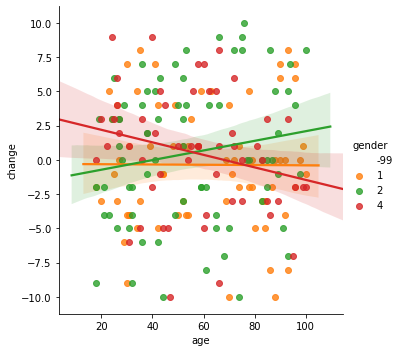

In [67]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(y = 'change', x = 'age', hue='gender', data = df)

In [68]:
import statsmodels.formula.api as smf
model = smf.ols("change ~ age + C(gender)", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5295
Date:                Fri, 15 Nov 2019   Prob (F-statistic):              0.663
Time:                        01:30:03   Log-Likelihood:                -593.84
No. Observations:                 201   AIC:                             1196.
Df Residuals:                     197   BIC:                             1209.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0903      0.643      0.

## Linear Regression with all Contextual Variables

In [69]:
model = smf.ols("change ~ age + C(gender) + C(CBTself) + C(CBTsess) + C(Anxiety_disorders) + C(Depression) + C(Bipolar_disorder) + C(Personality_disorders) + C(Psychosis) + C(Schizoaffective_disorder) + C(Schizophrenia) + C(Stress)", \
                data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.178
Date:                Fri, 15 Nov 2019   Prob (F-statistic):              0.286
Time:                        01:30:55   Log-Likelihood:                -584.21
No. Observations:                 201   AIC:                             1204.
Df Residuals:                     183   BIC:                             1264.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## TODO: Exploratory Factor Analysis